# Pima Indian Diabetes Prediction

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The task is to build a model that could predict with a reasonable accuracy if a person is more likely to develop diabetes or not using the Pima Indian Diabetes data.

This is a kind of Binary problem as the answer could be ***diabetes = true*** or ***diabetes =false***. Such problem can be faced with classification algorithms and considered that the task is a prediction it can be identified as a supervised machine learning task.

Given the amount of variables that could affect the life of a human being, setting the target accuracy to 70% might be a reasonable goal. This will be the bottom of the acceptable range.

# PREPARING THE DATA
The process will involve the following stpes:


1.   Get the data needed
2.   Inspect and clean the data
3.   Explore the data
4.   Mold the data to tidy data





Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [0]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

## Loading and Reviewing the Data



*   Importing the dataset from the github link



In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Mambros1984/Ada-Assignment-Neural-network/master/pima-data.csv")



*   Checking the size of the dataset. 
The first value is the number of rows; the second is the number of columns.






In [121]:
df.shape

(768, 10)



*   Inspecting the data checking the beginning rows of the dataframe through the **head()** method and specifying the number of lines to return.

N.B = notice that the first row has a 0 index and the Pandas dataframe has column names which are used to access specific rows and columns. They can be used together to access value belonging to specific rows and columns.


In [122]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True




*   Inspecting the data checking the ending lines of the dataframe through the **tail()** method.



In [123]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |


# CLEANING THE DATASET

Will now check if there is the need to eliminate columns based on the following criteria:


1.   Column not used;
2.   Column with null values;
3.   Duplicate columns.



## Check for null values

The panda method ***isnull()*** will make it easy to check if there is any null value in the dataframe.

In [124]:
df.isnull().values.any()


False

### Correlated Feature Check

Helper function that displays correlation by color.  Black is most correlated, White least.

In [0]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  white-light_grey-dark_grey-black => less to more correlated
                                                0 ------------------>  1
                                                Expect a black line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


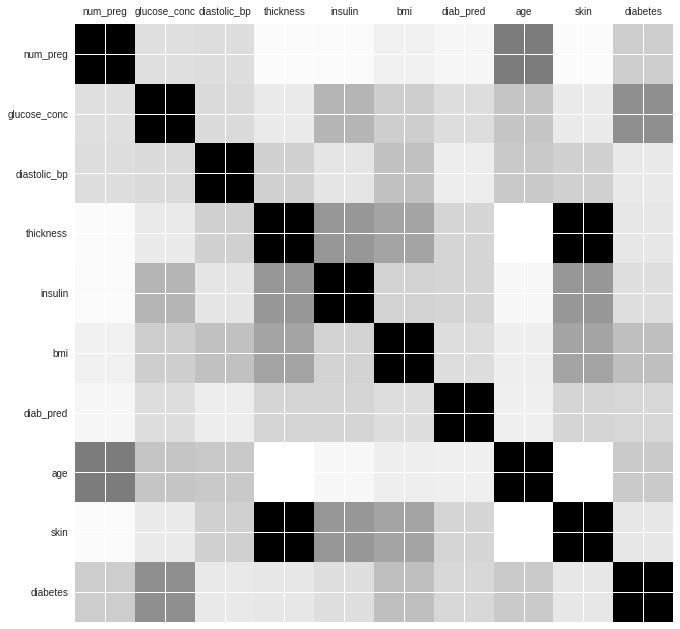

In [126]:
plot_corr(df)

Notice the column names running across the horizontal and vertical axes.

This is a matrix showing which columns have data values that are correlated with values in other columns.

Black means the columns are highly positively correlated. 

Since we have the same columns along the horizontal and vertical axes, black squares are expected on a diagonal from upper left to the lower right.

There are actually 2 squares in positions they're not expected to be in, the **skin** and the **thickness**. This means there are strong correlations between these 2 columns.

Checking now the correlation numbers to verify the result shown on the graph to see how correlated the **skin** and the **thickness** are.

In [127]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


Notice the 1.00 value running down the diagonal of the table. This is because of each column with itself which is of course a perfect correlation. 

The same happens for the **thickness** and **skin** columns which is not expected. Having two features that move together adds no additional information.

The solution to this problem is to drop at least one column, in this case the **skin** column.

In [128]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column using the ***del*** command.

In [0]:
del df['skin']

Checking the **skin** column has been dropped.

In [130]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Check for additional correlations to make sure the dataset is clean, therefore no black squares should be seen other than on the diagonal.

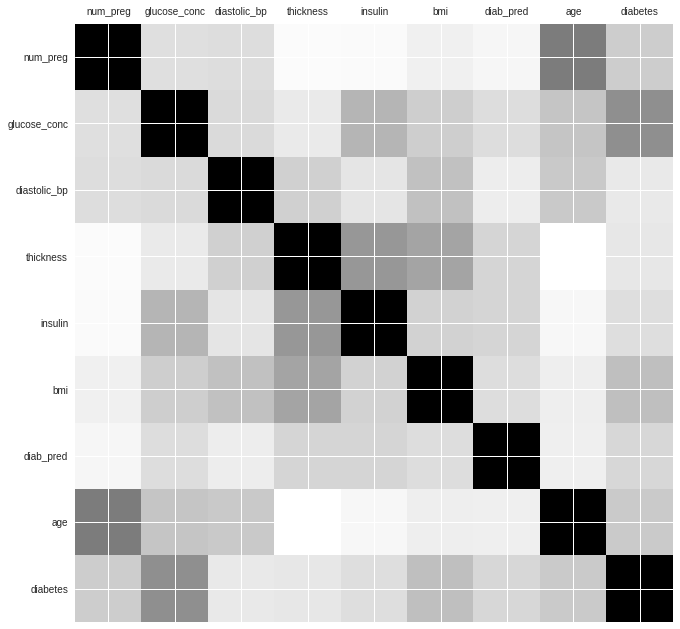

In [131]:
plot_corr(df)

The correlations look good.  There appear to be no coorelated columns.

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [132]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change diabetes from boolean to integer, True=1, False=0

A mapping dictionary will be used to define those values as the Panda dataframe will do the work iterating through the data.

In [0]:
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

Verifying that the diabetes data type has been changed.

In [134]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for null values

In [135]:
df.isnull().values.any()

False

No obvious null values.

### Check class distribution 

At this point the class distribution will be checked analysing how many **diabetes = true** and **diabetes = false** are in the dataset to understand if the information are suitable to train the model and get reasonable results.

If the dataset was containing either a vast majority of true cases and a few false or viceversa, there would have been the need to gather more information to be able to proceed to build an acceptable model.

In this case the data seem split in a way that will allow the model to be trained without implementing more information.

In [136]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


# TRAINING THE ALGORITHM

### Spliting the data 

Data will be splitted in 70% for training and 30% for testing.

The algorithm will be trained with the training set while the testing set will be used to verify the quality of the training. The test set will never be used for training.

The ***scikit-learn***  train test split method will be used for this task.

The feature columns and the predicted column will be defined and the prepared data will be split in two dataframes, one containing the feature columns and the other with the predicted diabetes result for each observation row.

A value of 0.30 (30%) is assigned to the **test_size** value.

These dataframes and the test size are passed to the **train test split** function which splits the original dataframes and returns four NumPy arrays of data.

The **random_state = 42** is an important feature that sets the seed for the random number generator used as part of the splitting process. Setting the seed to a constant insures that if the function is run again, the split will be identical.

In [0]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

Ensure that the split of the data  desired is 70% train, 30% test .

In this case the values are very close to the original data, therefore this is an acceptable split for the model.

In [138]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

Comparing the **diabetes = true** or **false** values among the ***Original dataset*** , ***Training dataset*** and ***Test dataset*** .

In [139]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [140]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Notice the value 0 for the **thickness** on the row **2**, that is physically impossible, therefore that is a hidden missing value.

Of those fields only the **insulin** column might have valid zero values. And even in this, zero is likely not correct.

This seem like a missing data problem and can e overridden in 3 ways:


*   Ignoring those values;
*   Dropping the rows;
*   Replacing the values.

Of 768 rows, 374 are missing insulin values. This can't be ignored as it's almost 50% of data but at the same time those values will cause a bias.



In [141]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

Imputing is the method to replace those **0** values in the **insulin** column.

It will involve the creation of a new ***imputer*** object which will replace the missing values with the mean for all the values on the axis zero which is column.

The **imputer fit_transform** function has been used to create a new NumPy array with any feature value of zero replaced by the mean for the column. This is applied to both training and test feature value separately as the values in the dataset are different.

In [0]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Random Forest

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The process will involve to :


1.   Import the model;
2.   Train the model;
3.   Check the accuracy on the training data;
4.   Check the accuracy on the test data.



In [143]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [144]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


### Predict Test Data

In [145]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


The accuracy of the training data is great, on the other side the accuracy of the test data looks very poor compared to the first one.
This happens because the **Random forest** model is overfitting the training data, the model has learned the training data too well. The overfitting could be handled with special tuning parameters called ***Regularisation hyperparameters*** or through the **cross validation**.

The **cross validation** uses multiple subsets of the training data during the training process.


In the matrix below the values are stored in the following way:

*   Top left = True Negative
*   Top right  = False Positive (in a perfect classifier it would be 0)
*   Bottom left = False Negative (in a perfect classifier it would be 0)
*   Bottom right = True Positive

The **recall** column (true positive rate and sensitivity) looks pretty poor as it returns only 54% . It should show how well the model is predicting the diabetes when the result is actually diabetes.



In [146]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



## Logistic Regression

The other model taken in consideration is the **logistic regression** that despite the name is a classification algorithm.

As done in the previous model the algorithm will be trained and the results will be evaluated.

In [147]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



The accuracy in this case looks promising, 74%, but the recall is still low, 55%.

Setting regularization parameter to try to retun a higher recall.

The while loop will try C values from zero to 4.9 in increments of 0.1. 

For each C value, its LogisticRegression object is created and trained with the training data, and then used to predict the test results. Each test recall score is computed and the highest recall score is recorded.
That score is used to get the C value that produced the highest recall score.
The recall scores have been plotted versus regularisation value so that an idea of how recall changes with different regularization values can be achieved.

1st max value of 0.613 occured at C=1.400


Text(0,0.5,'recall score')

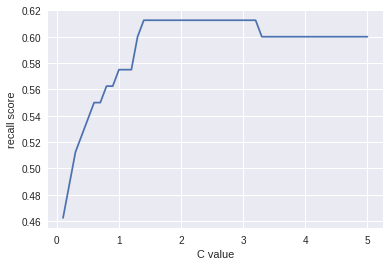

In [148]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


The recall value is still far from 70%, it's 61% .

The issue could be cause by the nature of the dataset that had more non-diabetes results than diabetes results. This is an unbalance between those 2 classes.

To avoid this the ***class_weight="balanced"*** will be passed as hyperparameter in the loop to find the best value of C.

### Logisitic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0,0.5,'recall score')

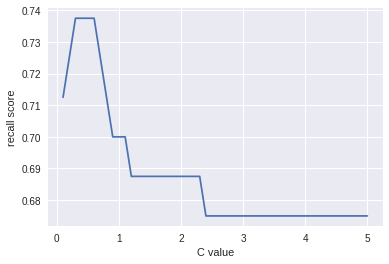

In [149]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

The **LogisticRegression** will be performed now adding the C value to the best one from the loop above and the class balance hyperparameter will be included as well.

In [150]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231

0.7375


The accuracy is now 71% and the recall is 74% !


### LogisticRegressionCV

The **LogisticRegression** function will be now used together with the **cross validation** method to check if it will improve the results.



In [151]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

The recall score is not quite what has been achieved in the previous run by tuning the score against the test data, but by using cross validation  it's more likely to score better on real-world data.

Also with this ensemble algorithms there are a lot of parameters that can be adjusted and implementing them might boost the score results.

### Predict on Test data

In [152]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[108  43]
 [ 26  54]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       151
          1       0.56      0.68      0.61        80

avg / total       0.72      0.70      0.71       231



**CLUSTERING ALGORITHM**

The **diabetes** column values will be converted from categorical variables into numeric form using the Label Encoder

In [153]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['diabetes'] = le.fit_transform(df['diabetes'].astype(str))
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The estimator for the clustering algorithm is being setup here and the only hyperparameter that needs to be passed in is the **bandwidth**.
Smaller values of bandwidth will result in tall, skinny kernels, while larger values of bandwidth will result in short and fat kernels.

In [155]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth = 90)
analyzer.fit(df)

MeanShift(bandwidth=90, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

The **estimate_bandwidth** is a helper function to help estimate a good value for the bandwidth based on the data.

In [156]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(df)

88.16372168931862

In [0]:
labels = analyzer.labels_

In [158]:
import numpy as np

np.unique(labels)

array([0, 1, 2, 3])

Above can be seen that a bandwidth of 90 produces 4 clusters. Each of this groups will contain persons with similar characteristics.

A new column called **cluster_group** will be added to store information about what cluster each person belongs to.

In [0]:
import numpy as np

df['cluster_group'] = np.nan
data_length = len(df)
for i in range(data_length):
  df.iloc[i, df.columns.get_loc('cluster_group')] = labels[i]

Checking if the new column has been added at the end of the dataframe.

In [160]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes,cluster_group
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0


The describe function will display the information about the entire dataset. 

In [161]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes,cluster_group
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.083333
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.303536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000


The following mean function will perform a group by using the cluster_group column and find the mean for each cluster.

This will be the average for all characteristics within each group.

In [162]:
diabete_cluster_data = df.groupby(['cluster_group']).mean()
diabete_cluster_data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
cluster_group,,,,,,,,,
0.0,3.858956,118.035261,68.873061,19.636107,54.727786,31.709591,0.462307,33.207334,0.332863
1.0,3.709091,154.272727,71.745455,31.472727,356.618182,35.280000,0.559709,33.090909,0.545455
2.0,4.000000,162.000000,78.666667,32.000000,674.666667,39.233333,1.147667,35.333333,0.333333
3.0,1.000000,189.000000,60.000000,23.000000,846.000000,30.100000,0.398000,59.000000,1.000000


The following method will return the number of samples that exist in each cluster and make the table above more understandable.

It seems there are 2 clusters that are sufficient data points for it to be actually significant. The last 2 clusters have just 3 and 1 persons in them and there isn't much that can be learned from those two.

The first cluster with 709 persons is by far the most common one with an average age of 33 and the diabetes rate is almost the same as the whole dataset. 
The amount of insulin they get compared to the other clusters is very low. and can be noticed that in the second cluster (55 persons) this goes together with an higher diabetes rate, 54%.

Last two clusters don't tell much as they are way different in many values from the first two and that could mean those are edge cases scenarios.

In [163]:
diabete_cluster_data['Counts'] = pd.Series(df.groupby(['cluster_group']).size())
diabete_cluster_data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes,Counts
cluster_group,,,,,,,,,,
0.0,3.858956,118.035261,68.873061,19.636107,54.727786,31.709591,0.462307,33.207334,0.332863,709
1.0,3.709091,154.272727,71.745455,31.472727,356.618182,35.280000,0.559709,33.090909,0.545455,55
2.0,4.000000,162.000000,78.666667,32.000000,674.666667,39.233333,1.147667,35.333333,0.333333,3
3.0,1.000000,189.000000,60.000000,23.000000,846.000000,30.100000,0.398000,59.000000,1.000000,1


Funciont to describe the persons belonging to the first cluster.

In [164]:
df[df['cluster_group'] == 0 ].describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes,cluster_group
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.0
mean,3.858956,118.035261,68.873061,19.636107,54.727786,31.709591,0.462307,33.207334,0.332863,0.0
std,3.376534,30.701224,19.868372,16.017210,69.081959,7.924295,0.318774,11.690483,0.471571,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.0
25%,1.000000,98.000000,62.000000,0.000000,0.000000,27.000000,0.240000,24.000000,0.000000,0.0
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.365000,29.000000,0.000000,0.0
75%,6.000000,136.000000,80.000000,32.000000,105.000000,36.100000,0.607000,41.000000,1.000000,0.0
max,17.000000,199.000000,122.000000,99.000000,240.000000,67.100000,2.420000,81.000000,1.000000,0.0


Function displaying each person belonging to the first cluster.

In [165]:
df[df['cluster_group'] == 0 ]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes,cluster_group
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0
5,5,116,74,0,0,25.6,0.201,30,0,0.0
6,3,78,50,32,88,31.0,0.248,26,1,0.0
7,10,115,0,0,0,35.3,0.134,29,0,0.0
9,8,125,96,0,0,0.0,0.232,54,1,0.0
10,4,110,92,0,0,37.6,0.191,30,0,0.0
